# Combinatorics documentation

We are working with the combinatorial objects appearing in the theory of the weight systems. 
This theory is closely related to knot theory.

As for now, the library is in a test version, so please write and run your code in `test.py` file.
The `combinatorics` library uses `tikz` package of $\LaTeX$, so make sure you have them (`tikz` and $\LaTeX$) installed on your computer.

The external `python` libraries we use are `math`, `typing`, `itertools`, `os`. 
Make sure you have them, and if not, use `pip install`.

To use the library, code like this:

In [1]:
import combinatorics as comb

## Combinatorial objects

* [Permutations](#permutations);
* [Graphs](#graphs);
* [Arc diagrams](#arc-diagrams);
    + [Chord diagrams](#chord-diagrams).

remaek

### <a id="permutations">Permutations</a>

A **permutation** on $[n]$ is a bijection from a set $[n]:=\{1, 2, \dots, n\}$ to itself. 
A **product** of two permutations is just the composition of maps they define.
A **transposition** $(i j)$ is a permutation that maps $i$ to $j$ and $j$ to $i$ fixing all the other elements. 
Every permutation can be given by the product of transpositions.
All permutations on $[n]$ with described multiplication form a group $S_n$, which is called a **symmetric group**.

#### Syntax

* `comb.Permutation(*image)`

We define a permutation $\sigma$ by a tuple `image`, such that `image[i]` $=\sigma(i+1)$ 
(notice that in Python numeration of list elements starts from $0$, therefore we have to shift the index by one).

We have a regular multiplication of permutation defined on the same set $[n]$. In the following example $n=3$.

In [2]:
sigma = comb.Permutation(1, 3, 2)
theta = comb.Permutation(2, 3, 1)

sigma * theta

Permutation(3, 2, 1)

#### Methods

* `comb.Permutation.all(n: int)`

Returns a list of all the permutations in $S_n$.

In [3]:
comb.Permutation.all(3)

[Permutation(1, 2, 3),
 Permutation(1, 3, 2),
 Permutation(3, 2, 1),
 Permutation(2, 1, 3),
 Permutation(3, 1, 2),
 Permutation(2, 3, 1)]

* `comb.Permutation.cyclic(*cycles: tuple, order: int)`

Given cycles as list tuples `cycles` and an integer number `order` $=n$, returnes a permutation in $S_{n}$ with a cycle decomposition described by `cycles`. 

In [4]:
comb.Permutation.cyclic((1, 3), (2, 4, 5), order = 6)

Permutation(3, 4, 1, 5, 2, 6)

* `.add_length(add: int)`

For `add` being a non-negative integer and given a permutation $\sigma \in S_n$, method `.addlength(add)` returns a new permutation $\sigma' \in S_{n+add}$, that maps $[n]$ the same way as $\sigma$ and fixing all other elements of $[n+add]$. 
In other words,
$$ \sigma'(i) = 
\begin{cases} 
    \sigma(i), & i \in [n]; \\
    i, & i \not\in [n].
\end{cases}$$  


In [5]:
sigma2 = sigma.add_length(3)
sigma2

Permutation(1, 3, 2, 4, 5, 6)

* `.im()` (or `.image`)

Returns a tuple `image` that determines the permutation.

In [6]:
theta.im()

(2, 3, 1)

* `.inverse()`

Returns the inverse permutation.

In [8]:
theta.inverse()

Permutation(3, 1, 2)

* `.isId()`

Returns `True` if a given permutation is an identical element and `False` otherwise.

In [7]:
comb.Permutation(1,2,3).isId()

True

* `.len()` (or `.length`)

For $\sigma \in S_n$ returns $n$.

In [9]:
sigma.len()

3

### <a id="graphs">Graphs</a>

A **simple undirected graph** of order $n$ is a pair $G = (V, E)$, where $V$ is a set whose elements are called **vertices**, and $E$ is a set of paired vertices, whose elements are called **edges**.
A **product** of two graphs is their disconnected union.

We label all the vertices of a graph $G$ from $1$ to $n$, where $n$ is an order of $G$.

#### Syntax

* `comb.Graph(*edges: tuple, order: int)`

`edges` is a list of all the edges in the graph, each edge is given by a tuple $(v_1, v_2)$ (or a list), where $v_1$ and $v_2$ are the endpoints of an edge. 
`vertices` is either a list of all the verices, or just those that have no edges coming out of them.

In [48]:
graph1 = comb.Graph((1, 2), (2, 3), (1, 3), (1, 4), order=6)
print(repr(graph1))

graph2 = comb.Graph((1, 3), (2, 4))
print(repr(graph2))

Graph((1, 2), (1, 3), (1, 4), (2, 3), order = 6)
Graph((1, 3), (2, 4), order = 4)


* `.__mul__`

Gives a product of two graphs.

In [12]:
graph1 * graph2

Graph((1, 2), (1, 3), (1, 4), (2, 3), (7, 9), (8, 10), order = 10)

#### Methods

* `.add_vertices(n)`

Retuns a graph with additional n disconnected vertices.

In [13]:
new_graph_2 = graph2.add_vertices(3)
new_graph_2

Graph((1, 3), (2, 4), order = 7)

* `.add_edges(*edges)`

Retuns a graph with additional egdes. `edges` is a list of tuples (or lists) of size 2 described in section Syntax.

In [14]:
graph_2 = graph2.add_edges((2, 3),(1, 3))
graph_2

Graph((1, 3), (2, 3), (2, 4), order = 4)

* `.contract(edge)`

Retuns a graph with contracted egde.
If edge is not in a graph, an error occures.

In [15]:
comb.Graph((1, 3), (2, 3), (2, 4), order = 4).contract((2, 3))

Graph((1, 2), (2, 3), order = 3)

* `.delete_vertex(vertex)`

Returns a graph without a vertex with number `vertex`.

In [16]:
new_graph_1 = graph1.delete_vertex(3)
new_graph_1

Graph((1, 2), (1, 3), order = 5)

* `.delete_edge(edge)`

Returns a graph without an edge given by a tuple or a list `edge`.

In [17]:
G = new_graph_1.delete_edge((1, 3))
G

Graph((1, 2), order = 5)

If there is no `edge` in the graph, then method `.delete_edge` returns the initial graph.

In [18]:
G = G.delete_edge((1, 3))
G

Graph((1, 2), order = 5)

* `.isdiscrete()`

Returns `True` if graph is discrete (i.e. containing no edges), `False` otherwise.

In [19]:
print(comb.Graph(order = 5).isdiscrete())
print(comb.Graph((1, 3), order = 3).isdiscrete())

True
False


* `.neighbors(vertex)`

Returns a list of all vertices adjacent to `vertex`.

In [20]:
comb.Graph((1, 3), (1, 4), (1, 5)).neighbors(1)

[3, 4, 5]

#### Funtions

* `comb.create_picture(comb.Graph(*edges, order), name='picture')`

Creates a `.pdf` image of a graph, placing all its vertices on the circle. 
By default, the picture will be called `picture.pdf`.

In [21]:
comb.create_picture(comb.Graph((1, 2), (2, 3), (1, 3), (2, 4), (3, 6), order = 7), name='example_graph')

<div>
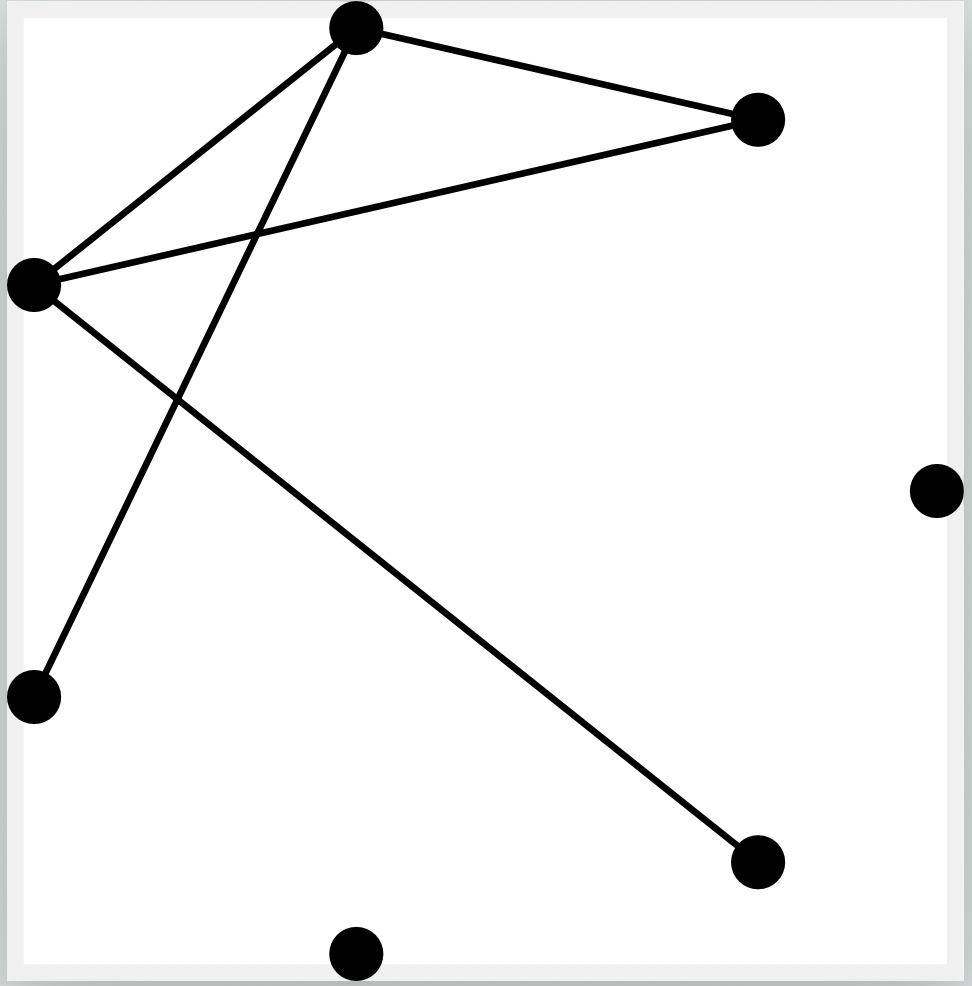
</div>

### <a id="arc-diagrams">Arc diagrams</a>

An **arc diagram** of order $n$ is an oriented straight line, considered up
to orientation-preserving diffeomorphisms, with $2n$ pairwise distinct points chosen
on it and grouped into $n$ pairs. 
For clarity, each distinguished pair of points on the
line is connected by an arc lying in a fixed half-plane. 
We call these lines **chords** or **arcs**.
By gluing ends of diagram's line together, we obtain a [chord diagram](#chord-diagrams) described below.

Every arc diagram defines a [permutation](#permutations) of specific kind. 
Let us enumerate endpoints of chords from $1$ to $2n$ in the order they lie on the line.
Then each chord with endpoints labelled $i$ and $j$ gives a transposition $(i j)$, and the desired permutation is just the product of all these transpositions for all the chords.
The obtained permutation is an involution without fixed points.

#### Syntax

* `comb.ArcDiagram(*chords: int)`

For a given arc diagram of order $n$, enumerate all its chords from $1$ to $n$.
Let's label every endpoint of a chord by its chord number. 
Then `chords` is a list of these labels given in order of their position on the line.
List `chords` should contain only elements of $[n]$, and each number must appear exactly twice.

A **multiplication** of two diagrams is just a concatination.

In [22]:
arc_diagram1 = comb.ArcDiagram(1, 3, 2, 1, 2, 3)
arc_diagram2 = comb.ArcDiagram(2, 1, 1, 2)

arc_diagram1 * arc_diagram2

ArcDiagram(1, 3, 2, 1, 2, 3, 5, 4, 4, 5)

#### Methods

* `.another_end(point: int)`

Having a `point` on the line, which is given by a number from $0$ to $2n-1$, we first find a chord it belongs to and then return the number of the second endpoint of the chord.

In [23]:
arc_diagram1.another_end(1)

5

* `.Chords()`

Returns a list containing chords. Each chord is given by the indices of its endpoints.

In [24]:
arc_diagram1.Chords()

[[0, 3], [2, 4], [1, 5]]

* `.endpoints()`

Returns a list of the endpoints numbered by the chords.

In [49]:
comb.ArcDiagram(1, 2, 3, 2, 1, 3).endpoints()

(1, 2, 3, 2, 1, 3)

* `.intersectbool(i, j)`

Returns `True` if chord `i` and chord `j` intersect one another, and `False` otherwise.

In [26]:
arc_diagram1.intersectbool(1, 2) # chords number 1 and 2 indeed intersect

True

* `.normal_form()`

A method `.normal_form()` returns an arc diagram with renumbers arcs of an arc diagram in the order their first (according to the orientation of the line) endpoints lay on the line.

In [50]:
comb.ArcDiagram(4, 3, 2, 1, 1, 2, 3, 4).normal_form()

ArcDiagram(1, 2, 3, 4, 4, 3, 2, 1)

* `.order()`

Returnes an order of an arc diagram (which is just the number of its chords).

In [28]:
arc_diagram1.order()

3

* `.permutation_form()`

Returnes a permutation that corresponds to a given arc diagram.

In [29]:
arc_diagram1.permutation_form()

Permutation(4, 6, 5, 1, 3, 2)

* `.shift(direction='right')`

Returns a shifted to the `direction` arc diagram. The `direction` of a shift can be either `'right'` or `left`. By default, `direction = 'right'`.

In [30]:
comb.ArcDiagram(1, 2, 3, 1, 3, 2).shift('left')

ChordDiagram(2, 3, 1, 3, 2, 1)

### <a id="chord-diagrams">Chord diagrams</a>

A **chord diagram** of order $n$ is an oriented circle considered up to
orientation-preserving diffeomorphisms, with $2n$ pairwise distinct points chosen on
it, which are grouped into n pairs. 
For clarity, we connect each pair of selected
points on the circle by a **chord**, a line segment or an arc lying inside the circle.
The circle itself is called a **Wilson loop**. 
From a chord diagram we can obtain an arc diagram by choosing a cutting point different from $2n$ chosen points on a circle.

The **intersection graph** of a chord diagram is the graph whose vertices correspond to chords of the diagram and whose edges connect those and only those vertices whose chords intersect.

#### Syntax

* `comb.ChordDiagram(*chords: int)`

`ArcDiagram` is a parent for `ChordDiagram` in a sence that all the methods of `ArcDiagram` can be used for `ChordDiagram`.
However, `ChordDiagram` has additional methods and functions.

The **multiplication** for two diagrams is now not well-defined.
However, it turns out that if we consider chord diagrams modulo $4T$-relations (which are described somewhere else), then the multiplication is still make sence.
So we just leave this method as it is. 

In [31]:
chord_diagram1 = comb.ChordDiagram(1, 3, 2, 2, 1, 3)
chord_diagram2 = comb.ChordDiagram(2, 1, 1, 2)

chord_diagram1 * chord_diagram2

ChordDiagram(1, 3, 2, 2, 1, 3, 5, 4, 4, 5)

* `.__eq__()`

Two chord diagrams are equal if the corresponding arc diagrams are equal, maybe after shifting for one of them. 
We also do not care about the labels on the endpoints, so we consider chord diagrams modulo labellings.

In [32]:
a = comb.ChordDiagram(1, 2, 3, 2, 3, 1)
b = comb.ChordDiagram(1, 2, 3, 3, 1, 2) # here we have to shift an arc diagram b by 3.
a == b

True

#### Methods

* `.intersection_graph()`

Returns an intersection graph of a given chord diagram.

In [33]:
a.intersection_graph()

Graph((2, 3), order = 3)

* `delete(chord)`

Returns a chord diagram without a chord number `chord`.

In [34]:
a.delete(1)

ChordDiagram(1, 2, 1, 2)

#### Functions

* `comb.create_picture(comb.ChordDiagram(*chords), name='picture')`

Creates a `.pdf` image of a graph, placing all its vertices on the circle. 
By default, the picture is called `picture.pdf`.

In [35]:
comb.create_picture(comb.ChordDiagram(1, 2, 3, 4, 1, 4, 2, 3), name='example_chord')

<div>
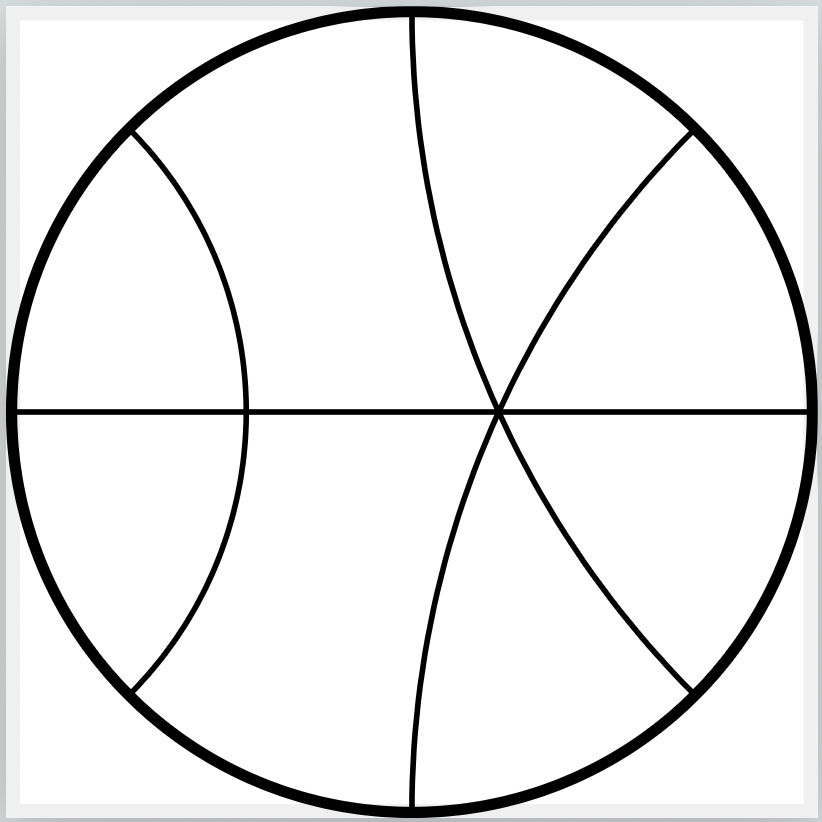
</div>

## Invariants

* Class Polynomial;
* Chromatic polynomial on graphs;
* $\mathfrak{sl}_2$-weight system.

#### Class Polynomial

This class was described in Homework 4 as a class `Poly`, so I'll skip its definition for now.
Except that I changed the main variable for $c$ instead of $x$.

#### Chromatic polynomial on graphs

The chromatic polynomial is a function $\chi_G(c)$ on graph $G$. 
It counts the number of graph colorings as a function of the number $c$.

* `comb.chromatic(comb.Graph(...))`

Returns a chromatic polynomial in the variable $c$.

In [36]:
print(comb.chromatic(comb.Graph((1, 2), order = 2)))
print(comb.chromatic(comb.Graph((1, 2), (2, 3), order = 3)))
print(comb.chromatic(comb.Graph((1, 2), (2, 3), (3, 4), (1, 4), (1, 3), (2, 4), order = 4))) # complete graph on 4 vertices
print(comb.chromatic(comb.Graph((1, 2), (2, 3), (3, 4), (1, 4), order = 5)))

c^2 - c
c^3 - 2c^2 + c
c^4 - 6c^3 + 11c^2 - 6c
c^5 - 4c^4 + 6c^3 - 3c^2


Function `chromatic` computes the values $\chi_G(c)$ via deletion–contraction formula:
$$ \chi_G = \chi_{G\backslash e} - \chi_{G/e}. $$
Here $G\backslash e$ is a graph $G$ without an edge $e$, and $\chi_{G/e}$ is a graph $G$ with contracted edge $e$.

#### $\mathfrak{sl}_2$-weight system

The $\mathfrak{sl}_2$-weight system is a function on chord diagrams.
It is similar to the chromatic polynomial in some sence, for example, the $\mathfrak{sl}_2$-weight system is also given by a polynomial in $c$.
Below you can see its combinatorial definition.

<div>
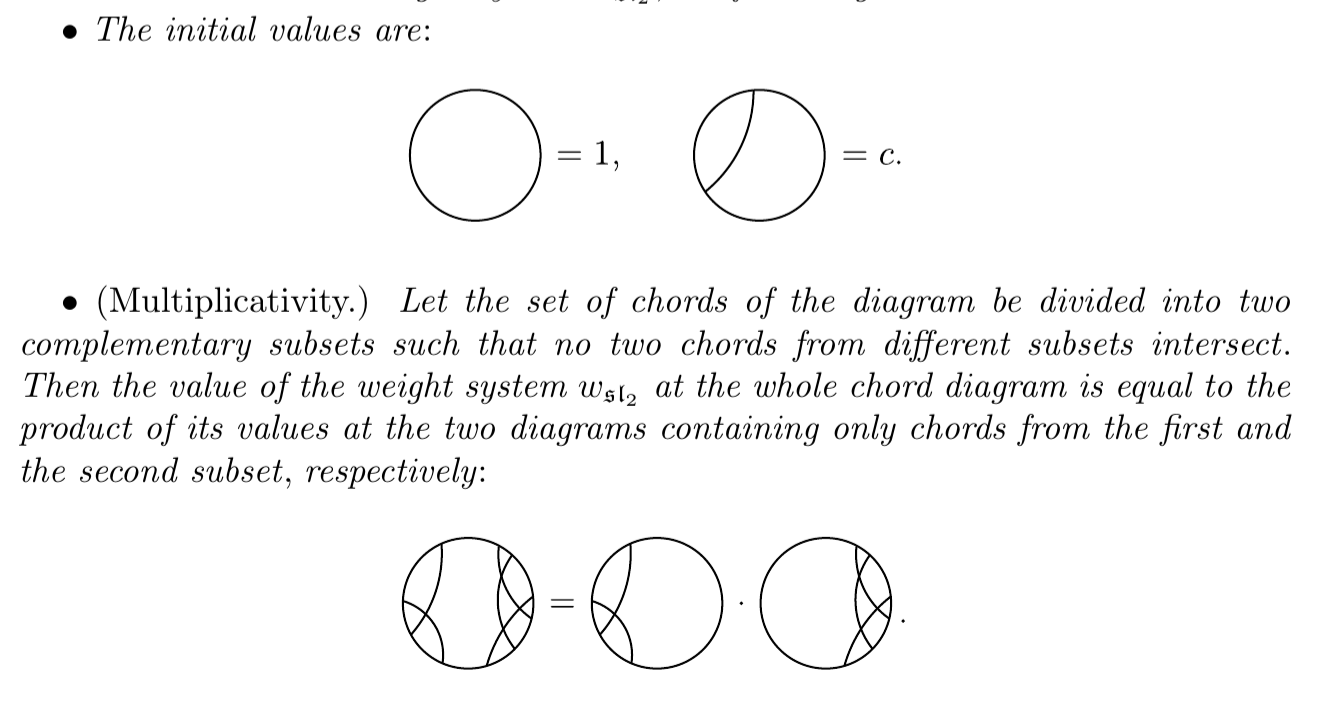
</div>

<div>
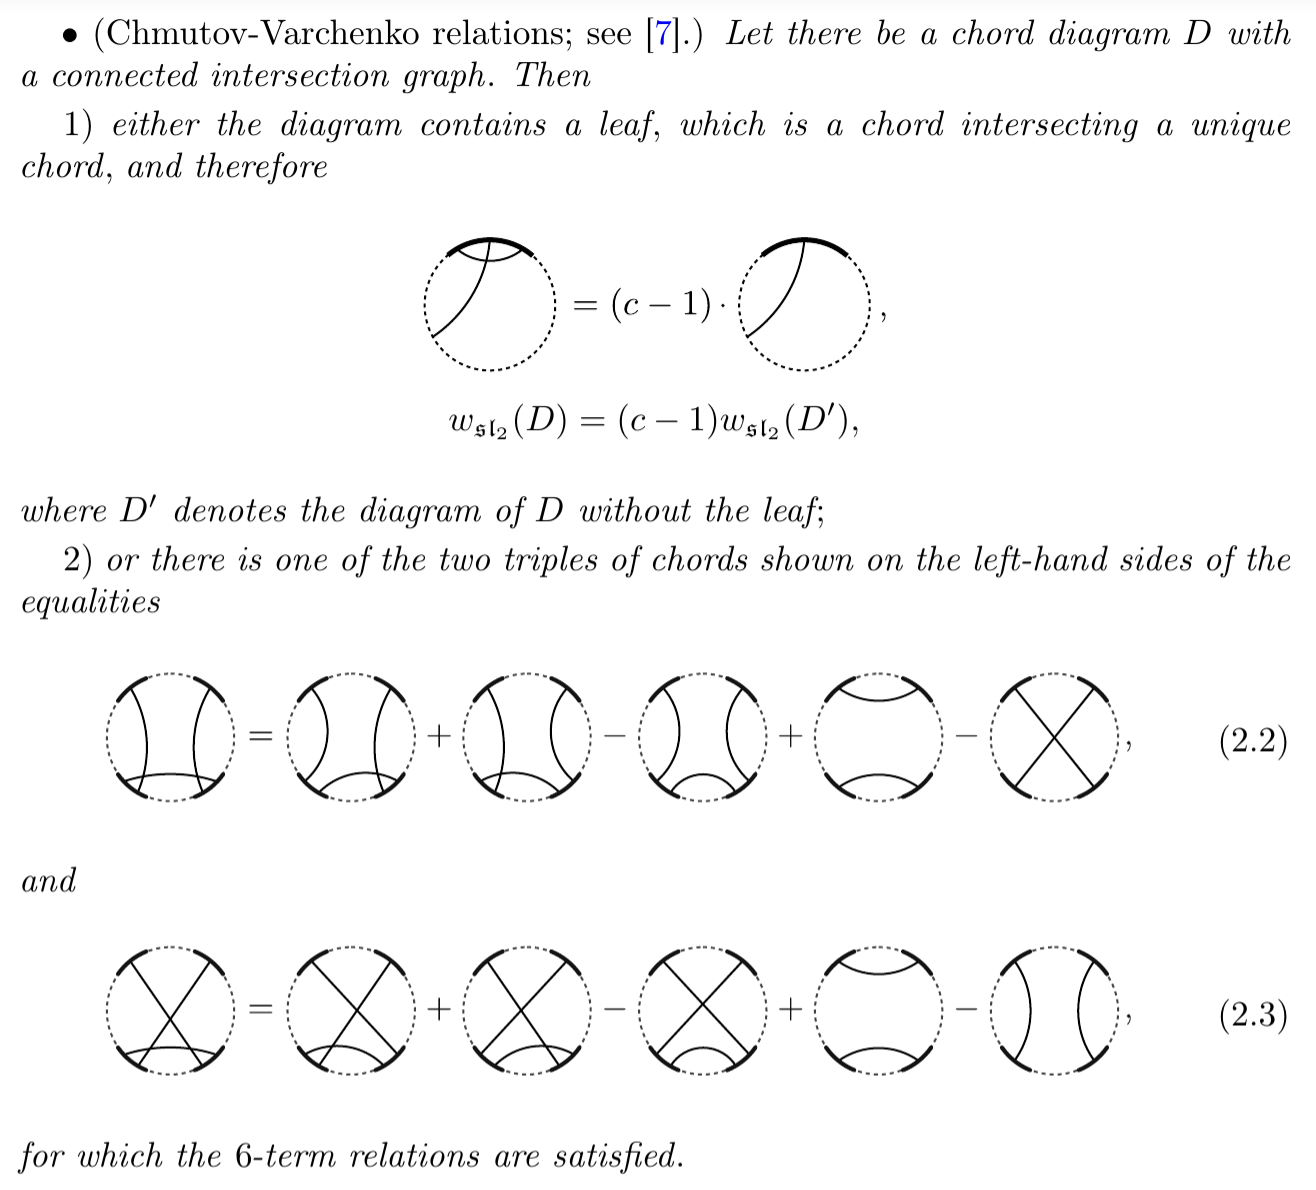
</div>

* `comb.wsl2(comb.ChordDiagrams(...))`

Returns a value of the weight function $\mathfrak{sl}_2$  as polynomial in the variable $c$.

In [45]:
print(comb.wsl2(comb.ChordDiagram()))
print(comb.wsl2(comb.ChordDiagram(1, 1)))
print(comb.wsl2(comb.ChordDiagram(1, 2, 1, 2)))
print(comb.wsl2(comb.ChordDiagram(1, 2, 3, 1, 2, 3)))
print(comb.wsl2(comb.ChordDiagram(1, 2, 3, 4, 1, 2, 3, 4)))
print(comb.wsl2(comb.ChordDiagram(1, 2, 3, 4, 5, 1, 2, 3, 4, 5)))
print(comb.wsl2(comb.ChordDiagram(1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6)))

1
c
c^2 - c
c^3 - 3c^2 + 2c
c^4 - 6c^3 + 13c^2 - 7c
c^5 - 10c^4 + 45c^3 - 79c^2 + 38c
c^6 - 15c^5 + 115c^4 - 430c^3 + 657c^2 - 295c
